# Analyzing the epidemiological outbreak of COVID-19

This project is inspired by RMOTR's Data Science project on COVID-19. 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.io as pio
#make plotly work with jupyter notebook
po.init_notebook_mode(connected=True) 

## Reading data

The COVID-19 data is loaded from the github page [2019-Novel Coronavirus Data Repository](https://github.com/CSSEGISandData/COVID-19) by John Hopkins University Center for Systems Science and Engineering. It is also supported by the ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

The data is collated from multiple sources over the world and is updated daily. As a result, we can get up to date information by reloading the data everyday.

The data we are interested in is - COVID-19_confirmed_global, COVID_19_deaths_global, COVID_19_recovered_global.

Let's load the data and look at some of its columns.

In [2]:
#raw.githubusercontent.com returns the raw content of the file stored in github. This can be found by clicking the RAW button on the github page
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)
print(covid_confirmed.shape)
display(covid_confirmed.head(10))

(263, 82)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,170,174,237,273,281,299,349,367,423,444
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,223,243,259,277,304,333,361,377,383,400
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,584,716,847,986,1171,1251,1320,1423,1468,1572
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,370,376,390,428,439,466,501,525,545,564
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,8,8,8,10,14,16,17,19
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,7,7,7,9,15,15,15,15,19,19
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,820,1054,1054,1133,1265,1451,1451,1554,1628,1715
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,482,532,571,663,736,770,822,833,853,881
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,78,80,84,87,91,93,96,96,96,99
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2032,2032,2182,2298,2389,2493,2580,2637,2686,2734


In [3]:
COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths  = pd.read_csv(COVID_DEATHS_URL)
print(covid_deaths.shape)
display(covid_deaths.head(10))

(263, 82)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,6,6,7,7,11,14,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,11,15,15,16,17,20,20,21,22,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,35,44,58,86,105,130,152,173,193,205
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,8,12,14,15,16,17,18,21,22,23
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,23,27,28,36,39,43,44,48,56,63
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,3,3,4,7,7,7,7,8,8,9
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,8,8,9,10,12,12,16,18,21,21


In [4]:
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
covid_recovered = pd.read_csv(COVID_RECOVERED_URL)
print(covid_recovered.shape)
display(covid_recovered.head(10))

(249, 82)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,5,5,10,10,10,15,18,18,29
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,44,52,67,76,89,99,104,116,131,154
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,37,46,61,61,62,90,90,90,113,237
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,10,10,10,10,16,21,26,31,39,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,1,1,1,1,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,228,240,248,256,266,279,280,325,338,358
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,30,30,31,33,43,43,57,62,87,114
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,2,3,8,11,18,18,28,40,40,40
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


The dataframes contain information about the total number of confirmed, deaths and recovered cases of COVID-19 all over the world.

## Exploratory Data Analysis

Lets check for missing values in the dataframes.

In [5]:
covid_confirmed.isna().sum()[covid_confirmed.isna().sum() != 0]

Province/State    181
dtype: int64

In [6]:
covid_deaths.isna().sum()[covid_deaths.isna().sum() != 0]

Province/State    181
dtype: int64

In [7]:
covid_recovered.isna().sum()[covid_recovered.isna().sum() != 0]

Province/State    182
dtype: int64

About 74% of the Province/State columns have missing values. The column could be ignored but it contains important stae/province information of some countries, especially China. Instead we will replace the NaN with an empty value.

In [8]:
covid_confirmed.fillna(value='', inplace=True)
covid_deaths.fillna(value='', inplace=True)
covid_recovered.fillna(value='', inplace=True)

In [9]:
#check to make sure no NaN values
print(covid_confirmed.isna().sum().sum())
print(covid_deaths.isna().sum().sum())
print(covid_recovered.isna().sum().sum())

0
0
0


The number of rows in covid_recovered df is less than the number in the other two dataframes. To check what data is missing, we performed a difference between the Country/Region columns which resulted in a null set. The Province/State column, however, gave a set of values from covid_confirmed that are missing in covid_recovered. All the provinces belong to Canada which has one row in the recovered dataframe. So no country info is missing anywhere. 

In [29]:
print(set(covid_confirmed['Country/Region']).symmetric_difference(covid_recovered['Country/Region']))
set(covid_confirmed['Province/State']).symmetric_difference(covid_recovered['Province/State'])

set()


{'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Recovered',
 'Saskatchewan',
 'Yukon'}

In [30]:
covid_confirmed[covid_confirmed['Country/Region'] == 'Canada']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,661,690,754,969,969,1075,1181,1250,1373,1373
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,970,1013,1013,1121,1174,1203,1203,1266,1266,1291
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,96,103,127,167,182,182,203,203,217,217
39,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,68,70,81,91,91,91,98,103,105,105
40,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,148,152,175,183,195,195,217,226,228,228
41,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,127,147,173,193,207,236,262,293,310,310
42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,...,1706,1966,2392,2793,3255,3630,4354,4347,4726,5276
43,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,0,...,18,21,21,22,22,22,22,22,22,25
44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,3430,4162,4611,5518,6101,6101,7944,8580,9340,10031


In [31]:
covid_recovered[covid_recovered['Country/Region'] == 'Canada']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
36,,Canada,56.1304,-106.3468,0,0,0,0,0,0,...,466,1592,1324,1735,2175,2577,3012,3256,3791,4154


#### Total number of cases over the world
Lets check the total number of COVID-19 cases in the world as of yesterday. This data is stored in the last column of the dataframes.

In [10]:
world_confirmed = covid_confirmed.iloc[:,(covid_confirmed.shape[1]-1)].sum()
world_deaths = covid_deaths.iloc[:, (covid_deaths.shape[1]-1)].sum()
world_recovered = covid_recovered.iloc[:,(covid_recovered.shape[1]-1)].sum()

In [11]:
print('Total number of confirmed cases of COVID-19 in the world as of {}: {}' .format(covid_confirmed.columns[-1],world_confirmed))
print('Total number of deaths due to COVID-19 as of {}: {}' .format(covid_deaths.columns[-1],world_deaths))
print('Total number recovered as of {}: {}' .format(covid_recovered.columns[-1],world_recovered))

Total number of confirmed cases of COVID-19 in the world as of 4/8/20: 1511104
Total number of deaths due to COVID-19 as of 4/8/20: 88338
Total number recovered as of 4/8/20: 328661


Based on the above data we can calculate the active cases -
$$ active = confirmed - deaths - recovered $$
        

In [12]:
world_active = world_confirmed - world_deaths - world_recovered
world_active

1094105

Lets save the world data in a dataframe and plot it using plotly's treemap.

In [13]:
world_cases = {
    'Confirmed': world_confirmed,
    'Deaths': world_deaths,
    'Recovered': world_recovered,
    'Active': world_active
}
world_cases = pd.DataFrame([world_cases])
world_cases

,Confirmed,Deaths,Recovered,Active
0,1511104,88338,328661,1094105


In [14]:
world_cases_long = world_cases.melt(value_vars=['Active', 'Deaths', 'Recovered'], value_name='count', var_name='status')
world_cases_long['path0'] = 'Confirmed' #in order to have a single root node or path for the treemap
world_cases_long

,status,count,path0
0,Active,1094105,Confirmed
1,Deaths,88338,Confirmed
2,Recovered,328661,Confirmed


In [15]:
fig = px.treemap(world_cases_long, path=['path0', 'status'], values='count', template='plotly_dark' )
#po.iplot(fig)

#fig.show(renderer = 'svg')
fig.show()

We can see that the majority (over 74%) of the cases are still active. 

#### Time versus total cases

Lets plot the growth of COVID-19 with time over the world. 

In [16]:
#calculate total cases for each column 
covid_confirmed_time = covid_confirmed.iloc[:, 4:].sum()
covid_time = pd.DataFrame(covid_confirmed_time).reset_index()
covid_time = covid_time.rename(columns= {'index': 'date', 0: 'confirmed'})

deaths_total = covid_deaths.iloc[:, 4:].sum()
recovered_total = covid_recovered.iloc[:, 4:].sum()

covid_time['deaths'] = deaths_total.values
covid_time['recovered']  = recovered_total.values

#also calculate the active cases using the previous equation
covid_time['active'] = covid_time['confirmed'] - covid_time['deaths'] - covid_time['recovered']

display(covid_time)

,date,confirmed,deaths,recovered,active
0,1/22/20,555,17,28,510
1,1/23/20,654,18,30,606
2,1/24/20,941,26,36,879
3,1/25/20,1434,42,39,1353
4,1/26/20,2118,56,52,2010
...,...,...,...,...,...
73,4/4/20,1197405,64606,246152,886647
74,4/5/20,1272115,69374,260012,942729
75,4/6/20,1345101,74565,276515,994021
76,4/7/20,1426096,81865,300054,1044177


In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['confirmed'], mode = 'lines+markers', name='Confirmed'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['active'], mode = 'lines+markers', name='Active'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['recovered'], mode = 'lines+markers', name='Recovered'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['deaths'], mode = 'lines+markers', name='Deaths'))
fig.update_layout(template = 'plotly_dark', title = 'Worldwide cases over time')
fig.update_xaxes(title = 'Date')
fig.update_yaxes(title = 'Number of Cases')
fig.show()

The growth rate of confirmed cases is exponential. It is hard to say if the rate is slowing down. Lets plot the cases on a log-scale to check if the rates are going down.

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['confirmed'], mode = 'lines+markers', name='Confirmed'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['active'], mode = 'lines+markers', name='Active'))
fig.update_layout(template = 'plotly_dark', title = 'Worldwide cases over time (log scale)')
fig.update_xaxes(title = 'Date')
fig.update_yaxes(title = 'Number of Cases', type = 'log', dtick=1) #dtick removes minor ticks
fig.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['recovered'], mode = 'lines+markers', name='Recovered'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['deaths'], mode = 'lines+markers', name='Deaths'))
fig.update_layout(template = 'plotly_dark', title = 'Worldwide recovery & mortality with time (log scale)')
fig.update_xaxes(title = 'Date')
fig.update_yaxes(title = 'Count', type = 'log', dtick=1)
fig.show()

The graphs show that the curves were flattening towards the end of Feburary/early March but have started increasing since then. This coincides with the rise in the number of cases outside of China.

### Recovery and Mortality Rates
Lets compare recovery vs mortality over time by calculating its ratios with respect to the confirmed cases.

In [20]:
covid_time['death_ratio'] = covid_time['deaths'] / covid_time['confirmed']
covid_time['recovered_ratio'] = covid_time['recovered'] / covid_time['confirmed']
covid_time

,date,confirmed,deaths,recovered,active,death_ratio,recovered_ratio
0,1/22/20,555,17,28,510,0.030631,0.050450
1,1/23/20,654,18,30,606,0.027523,0.045872
2,1/24/20,941,26,36,879,0.027630,0.038257
3,1/25/20,1434,42,39,1353,0.029289,0.027197
4,1/26/20,2118,56,52,2010,0.026440,0.024551
...,...,...,...,...,...,...,...
73,4/4/20,1197405,64606,246152,886647,0.053955,0.205571
74,4/5/20,1272115,69374,260012,942729,0.054534,0.204393
75,4/6/20,1345101,74565,276515,994021,0.055434,0.205572
76,4/7/20,1426096,81865,300054,1044177,0.057405,0.210402


In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_time['date'], y=covid_time['recovered_ratio'], mode='lines+markers', name='Recovery Ratio'))
fig.add_trace(go.Scatter(x=covid_time['date'], y=covid_time['death_ratio'], mode='lines+markers', name='Mortality Ratio'))
fig.update_layout(template = 'plotly_dark', title = 'Recovery and Mortality Ratios Over Time')
fig.update_xaxes(title = 'Date')
fig.update_yaxes(title = 'Ratio')
fig.show()

The recovery rate was increasing and mortality was constant until the first week of March. After that, there has been a drop in the recovery and death rates have increased by over 1%. This coincides with the spread of COVID-19 in Europe and North America where death tolls in areas like Italy and Spain have surpassed China.

### Visualizing worldwide cases on a map

To visualize confirmed cases on the world map we will make some changes to the dataframe. The data will be grouped by the 'country/region' column and all the cases will be added to get the total count. To get the correct latitude and longitude information, we will seperate the two columns from the rest and calculate its mean (when grouped by the country). Finally, we will reset the index to get a new dataframe grouped by country that will be converted to a 'long format' for use by plotly.

In [22]:
covid_confirmed_loc_country = covid_confirmed[['Country/Region','Lat', 'Long']].groupby(by ='Country/Region').mean()
covid_confirmed_loc_country.head(10)

,Lat,Long
Country/Region,,
Afghanistan,33.000000,65.000000
Albania,41.153300,20.168300
Algeria,28.033900,1.659600
Andorra,42.506300,1.521800
Angola,-11.202700,17.873900
Antigua and Barbuda,17.060800,-61.796400
Argentina,-38.416100,-63.616700
Armenia,40.069100,45.038200
Australia,-31.996188,141.232788


In [23]:
covid_confirmed_split = covid_confirmed.drop(columns=['Lat', 'Long'])
covid_confirmed_tot_country = covid_confirmed_split.groupby(by = 'Country/Region').sum()
covid_confirmed_tot_country.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,170,174,237,273,281,299,349,367,423,444
Albania,0,0,0,0,0,0,0,0,0,0,...,223,243,259,277,304,333,361,377,383,400
Algeria,0,0,0,0,0,0,0,0,0,0,...,584,716,847,986,1171,1251,1320,1423,1468,1572
Andorra,0,0,0,0,0,0,0,0,0,0,...,370,376,390,428,439,466,501,525,545,564
Angola,0,0,0,0,0,0,0,0,0,0,...,7,7,8,8,8,10,14,16,17,19
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,7,7,7,9,15,15,15,15,19,19
Argentina,0,0,0,0,0,0,0,0,0,0,...,820,1054,1054,1133,1265,1451,1451,1554,1628,1715
Armenia,0,0,0,0,0,0,0,0,0,0,...,482,532,571,663,736,770,822,833,853,881
Australia,0,0,0,0,4,5,5,6,9,9,...,4361,4559,4862,5116,5330,5550,5687,5797,5895,6010


In [24]:
#join the dataframes to get all information in one
covid_confirmed_grouped_country = covid_confirmed_loc_country.join(covid_confirmed_tot_country)
covid_confirmed_grouped_country.reset_index(inplace = True)

In [25]:
covid_confirmed_grouped_country.head(10)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,170,174,237,273,281,299,349,367,423,444
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,223,243,259,277,304,333,361,377,383,400
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,584,716,847,986,1171,1251,1320,1423,1468,1572
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,370,376,390,428,439,466,501,525,545,564
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,7,7,8,8,8,10,14,16,17,19
5,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,...,7,7,7,9,15,15,15,15,19,19
6,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,...,820,1054,1054,1133,1265,1451,1451,1554,1628,1715
7,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,...,482,532,571,663,736,770,822,833,853,881
8,Australia,-31.996188,141.232788,0,0,0,0,4,5,5,...,4361,4559,4862,5116,5330,5550,5687,5797,5895,6010
9,Austria,47.516200,14.550100,0,0,0,0,0,0,0,...,9618,10180,10711,11129,11524,11781,12051,12297,12639,12942


In [26]:
#change the dataframe to a long format
covid_confirmed_grouped_country = covid_confirmed_grouped_country.melt(id_vars=['Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Count')

In [60]:
#test to see if it worked
covid_confirmed[covid_confirmed['Country/Region'] == 'Netherlands']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
166,Aruba,Netherlands,12.5186,-70.0358,0,0,0,0,0,0,...,50,55,55,60,62,64,64,71,74,77
167,Curacao,Netherlands,12.1696,-68.9900,0,0,0,0,0,0,...,11,11,11,11,11,11,11,13,13,14
168,Sint Maarten,Netherlands,18.0425,-63.0548,0,0,0,0,0,0,...,6,6,16,18,23,23,25,37,40,40
169,,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,11750,12595,13614,14697,15723,16627,17851,18803,19580,20549
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2


In [56]:
fig = px.scatter_geo(covid_confirmed_grouped_country, 
                     lat ='Lat', lon = 'Long', size = 'Count', color='Count', color_continuous_scale='OrRd', 
                     hover_name= 'Country/Region', size_max = 50, animation_frame = 'Date', projection='equirectangular'
                    )
fig.update_layout(template = 'plotly_dark', title = 'Worldwide Confirmed Cases')
fig.show()

PS - the position of United Kingdom and Netherlands is not correct. Calculating the latitude and longitude based on the mean values of the different regions (e.g., Falkland Islands for UK and Aruba & Sint Marteen for Netherlands) have pushed them further south-west. This can be easily fixed by manually fixing the latitude and longitude values for the two countries.

### Countries with the most COVID-19 cases

Lets calculate countries with the highest number of cases.

To do that, we will group the dataframe by Country/Region (covid_confirmed already done previously) first and then calculate the maximum value.

In [32]:
confirmed_max = covid_confirmed_tot_country.max(axis=1).sort_values(ascending=False).reset_index()
confirmed_max = confirmed_max.rename(columns = {0: 'Count'})
display(confirmed_max[:10])

,Country/Region,Count
0,US,429052
1,Spain,148220
2,Italy,139422
3,France,113959
4,Germany,113296
5,China,82809
6,Iran,64586
7,United Kingdom,61474
8,Turkey,38226
9,Belgium,23403


Text(0, 0.5, 'Country')

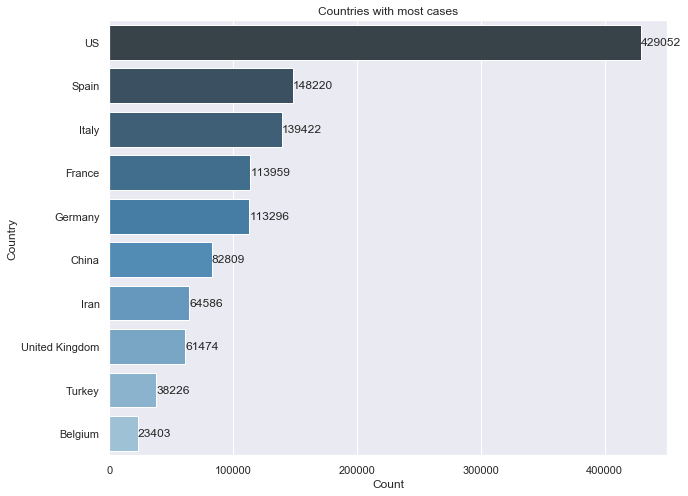

In [62]:
#we'll do a seaborn plot first and then an interactive plot using plotly.express
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.set_context('notebook')
ax = sns.barplot(confirmed_max['Count'].iloc[:10], confirmed_max['Country/Region'].iloc[:10], palette='Blues_d')
for p in ax.patches:
    width = p.get_width() #gives the x-position and the value to write
    #print(p.get_y())  #gives the y-position of the graph
    #print(p.get_height())  #gives the height of the bars
    ax.text(x = p.get_width(), y = p.get_y() + p.get_height()/2, s = '{:.0f}'.format(width), verticalalignment = 'center')
plt.title('Countries with most cases')
plt.ylabel('Country')

In [34]:
fig = go.Figure()
fig = px.bar(confirmed_max.iloc[:10].sort_values(by='Count'), x = 'Count', y = 'Country/Region', orientation='h', text = 'Count')
fig.update_layout(template = 'plotly_dark', title = 'Countries with most number of confirmed cases')
fig.update_traces(textposition = 'outside')
fig.show()

In [35]:
covid_deaths_grouped_loc = covid_deaths.groupby('Country/Region').sum()
covid_deaths_grouped_loc.drop(columns = ['Lat', 'Long'], inplace=True)
deaths_max = covid_deaths_grouped_loc.max(axis = 1).sort_values(ascending = False).reset_index()
deaths_max = deaths_max.rename(columns = {0: 'Count'})
deaths_max.iloc[:10]

,Country/Region,Count
0,Italy,17669
1,Spain,14792
2,US,14695
3,France,10887
4,United Kingdom,7111
5,Iran,3993
6,China,3337
7,Germany,2349
8,Netherlands,2255
9,Belgium,2240


Text(0.5, 1.0, 'Countries with highest number of deaths')

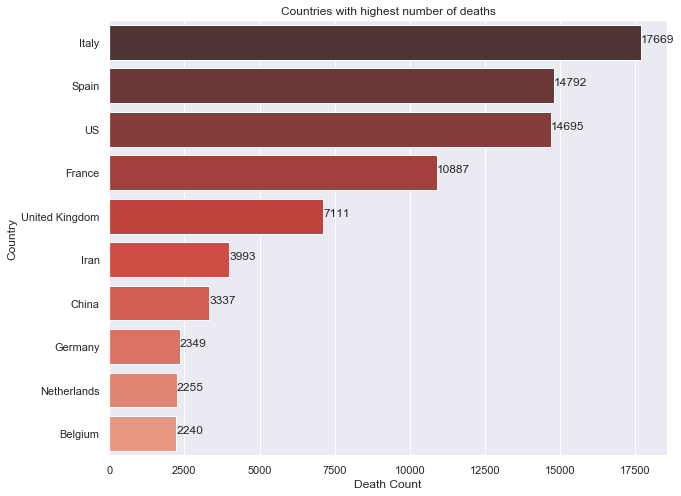

In [63]:
plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
ax = sns.barplot(x = deaths_max['Count'].iloc[:10], y = deaths_max['Country/Region'].iloc[:10], palette='Reds_d')
for p in ax.patches:
    width = p.get_width()
    ax.text(x = width, y = p.get_y()+p.get_height()/2, s = '{:.0f}'.format(width))
plt.xlabel('Death Count')
plt.ylabel('Country')
plt.title('Countries with highest number of deaths')

In [64]:
fig = go.Figure()
fig = px.bar(deaths_max.iloc[:10].sort_values(by='Count'), x = 'Count', y = 'Country/Region', orientation='h', text = 'Count')
fig.update_layout(template = 'plotly_dark', title = 'Countries with most number of deaths')
fig.update_traces(textposition = 'outside')
fig.show()

In [38]:
covid_recovered_grouped_loc = covid_recovered.groupby('Country/Region').sum()
covid_recovered_grouped_loc.drop(columns = ['Lat', 'Long'], inplace=True)
recovered_max = covid_recovered_grouped_loc.max(axis = 1).sort_values(ascending = False).reset_index()
recovered_max = recovered_max.rename(columns = {0: 'Count'})
recovered_max.iloc[:10]

,Country/Region,Count
0,China,77567
1,Spain,48021
2,Germany,46300
3,Iran,29812
4,Italy,26491
5,US,23559
6,France,21452
7,Switzerland,9800
8,"Korea, South",6776
9,Belgium,4681


Text(0.5, 1.0, 'Countries with the highest number of recovered patients')

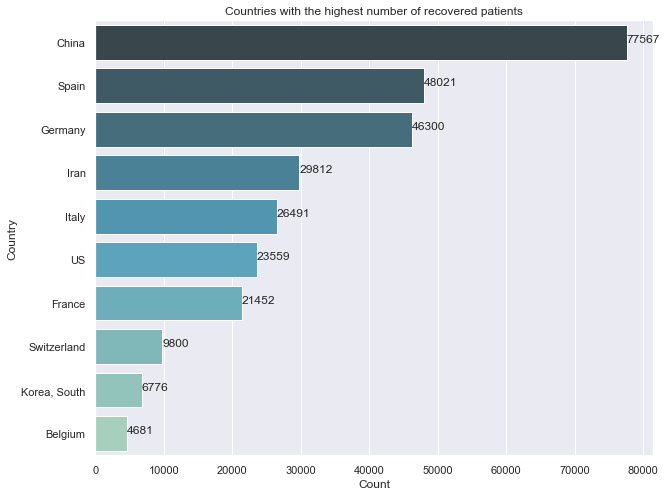

In [66]:
plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
ax = sns.barplot(x = recovered_max['Count'].iloc[:10], y = recovered_max['Country/Region'].iloc[:10], palette='GnBu_d')
for p in ax.patches:
    width = p.get_width()
    ax.text(x = width, y = p.get_y()+p.get_height()/2, s = '{:.0f}'.format(width))
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Countries with the highest number of recovered patients')

US tops the list of countries with the most number of confirmed COVID-19 cases. It surpasses both Italy and Spain which top the list with the most number of deaths. The confirmed cases and death toll for the US will probably increase in the next couple of weeks as it hits the peak of COVID-19. China has the most number of recovered patients. This is probably because the pandemic started earlier in China (November/December compared to February/March for the rest of the world) and is now declining.

### Countries with the highest mortality rates

We will now calculate the countries with the highest mortality and recovery rates(compared to the number of confirmed cases). We are only going to include countries that have had more than 5 deaths. 

We will create a new dataframe that contains the maximum values of confirmed, deaths and recovered cases, as well as death and recovery rates. Only countries (diamond princess not included) with more than 5 deaths will be included.

In [40]:
#find countries with less than 5 deaths maximum and Diamond Princess
covid_deaths_grouped_loc_max = covid_deaths_grouped_loc.max(axis = 1)
low_death_countries = covid_deaths_grouped_loc_max[covid_deaths_grouped_loc_max <= 5].index
low_death_countries = low_death_countries.insert(0, 'Diamond Princess')

#remove the low_death_countries from both confirmed and death dataframes and then calculate the ratio
high_death_countries_confirmed_cases = covid_confirmed_tot_country.max(axis = 1).drop(labels=low_death_countries)
high_covid_deaths = covid_deaths_grouped_loc_max.drop(labels=low_death_countries)

#create a dataframe will all maximum values
covid_max_df = high_death_countries_confirmed_cases.reset_index().rename(columns={0:'Max Confirmed'})
covid_max_df['Max Deaths'] = high_covid_deaths.values
covid_max_df['Max Recovered'] = covid_recovered_grouped_loc.max(axis=1).drop(labels = low_death_countries).values
covid_max_df['Death Rate'] = (covid_max_df['Max Deaths'] / covid_max_df['Max Confirmed']) * 100
covid_max_df['Recovery Rate'] = (covid_max_df['Max Recovered'] / covid_max_df['Max Confirmed']) * 100
covid_max_df



,Country/Region,Max Confirmed,Max Deaths,Max Recovered,Death Rate,Recovery Rate
0,Afghanistan,444,14,29,3.153153,6.531532
1,Albania,400,22,154,5.500000,38.500000
2,Algeria,1572,205,237,13.040712,15.076336
3,Andorra,564,23,52,4.078014,9.219858
4,Argentina,1715,63,358,3.673469,20.874636
...,...,...,...,...,...,...
92,Ukraine,1668,52,35,3.117506,2.098321
93,United Arab Emirates,2659,12,239,0.451297,8.988341
94,United Kingdom,61474,7111,345,11.567492,0.561213
95,Uruguay,424,7,150,1.650943,35.377358


In [41]:
sorted_vals = covid_max_df.sort_values(by = 'Recovery Rate', ascending = False)
print(sorted_vals['Country/Region'].iloc[:10])
sorted_vals['Death Rate'].iloc[:10]

21           China
53    Korea, South
44            Iran
86     Switzerland
50          Jordan
35         Germany
41         Iceland
96       Venezuela
1          Albania
45            Iraq
Name: Country/Region, dtype: object


21    4.029755
53    1.926040
44    6.182454
86    3.844502
50    1.675978
35    2.073330
41    0.371287
96    5.389222
1     5.500000
45    5.740433
Name: Death Rate, dtype: float64

Text(0.5, 1.0, 'Countries with highest death rates')

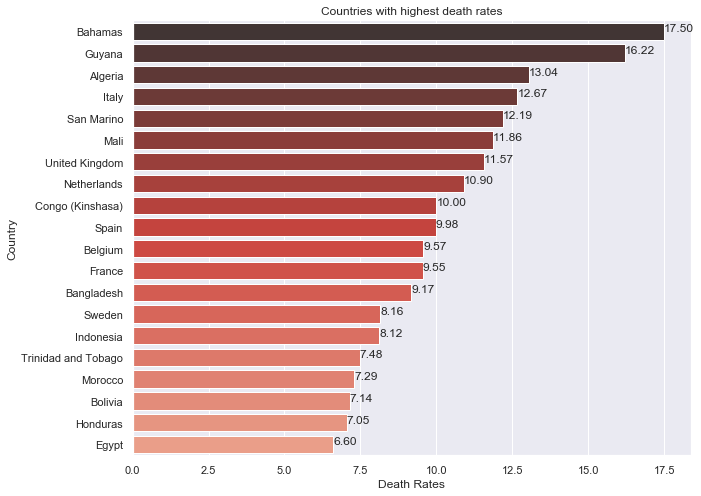

In [42]:
sorted_vals = covid_max_df.sort_values(by = 'Death Rate', ascending = False)
plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
ax = sns.barplot(x = sorted_vals['Death Rate'].iloc[:20], y = sorted_vals['Country/Region'].iloc[:20], palette='Reds_d')
for p in ax.patches:
    width = p.get_width()
    ax.text(x = width, y = p.get_y()+p.get_height()/2, s = '{:.2f}'.format(width))
plt.xlabel('Death Rates')
plt.ylabel('Country')
plt.title('Countries with highest death rates')

Text(0.5, 1.0, 'Countries with highest recovery rates')

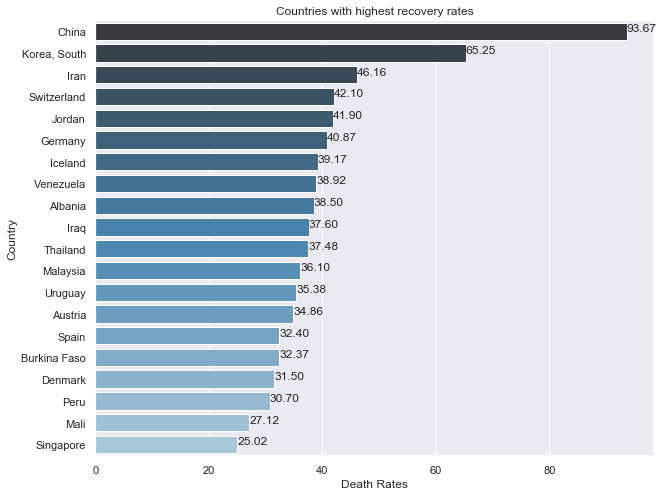

In [43]:
sorted_vals = covid_max_df.sort_values(by = 'Recovery Rate', ascending = False)
plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
ax = sns.barplot(x = sorted_vals['Recovery Rate'].iloc[:20], y = sorted_vals['Country/Region'].iloc[:20], palette='Blues_d')
for p in ax.patches:
    width = p.get_width()
    ax.text(x = width, y = p.get_y()+p.get_height()/2, s = '{:.2f}'.format(width))
plt.xlabel('Death Rates')
plt.ylabel('Country')
plt.title('Countries with highest recovery rates')

Italy and San Marino top the list of countries with the highest death rates. Congo, Bangladesh and Algeria come next, followed by UK, Netherlands and Spain. Though we hear a great deal about the number of deaths in countries like Italy and Spain, there have been no reports about the high rates of death in developing countries.

Update - As of April 9, Italy no longer holds the top spot for the highest death rates. However, we are seeing a lot of developing countries in the list. United Kingdom is also climbing up with 11.6 deaths per 100 confirmed.

### Study of top 3 countries with most confirmed cases - are the curves flattening?

Lets look at the cases for China, Italy, Spain and the US separately. 

#### Total cases

In [44]:
covid_China = covid_confirmed_tot_country[covid_confirmed_tot_country.index == 'China'].melt(var_name = 'Date', value_name = 'Count')
covid_Italy = covid_confirmed_tot_country[covid_confirmed_tot_country.index == 'Italy'].melt(var_name = 'Date', value_name = 'Count')
covid_Spain = covid_confirmed_tot_country[covid_confirmed_tot_country.index == 'Spain'].melt(var_name = 'Date', value_name = 'Count')
covid_US  = covid_confirmed_tot_country[covid_confirmed_tot_country.index == 'US'].melt(var_name = 'Date', value_name = 'Count')

In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = covid_China['Date'], y = covid_China['Count'], mode = 'markers', name='China'))
fig.add_trace(go.Scatter(x = covid_Italy['Date'], y = covid_Italy['Count'], mode = 'lines+markers', name='Italy'))
fig.add_trace(go.Scatter(x = covid_Spain['Date'], y = covid_Spain['Count'], mode = 'lines+markers', name='Spain'))
fig.add_trace(go.Scatter(x = covid_US['Date'], y = covid_US['Count'], mode = 'lines+markers', name='US'))
fig.update_layout(template = 'plotly_dark', title='Confirmed cases over time in China, Italy, Spain and USA')
fig.update_xaxes(title = 'Date')
fig.update_yaxes(type='log', dtick=1, title='Count (log scale)')
fig.show()

In [46]:
covid_Italy['Deaths'] = covid_deaths_grouped_loc[covid_deaths_grouped_loc.index == 'Italy'].melt(value_name='Deaths')['Deaths']
covid_China['Deaths'] = covid_deaths_grouped_loc[covid_deaths_grouped_loc.index == 'China'].melt(value_name='Deaths')['Deaths']
covid_Spain['Deaths'] = covid_deaths_grouped_loc[covid_deaths_grouped_loc.index == 'Spain'].melt(value_name='Deaths')['Deaths']
covid_US['Deaths'] = covid_deaths_grouped_loc[covid_deaths_grouped_loc.index == 'US'].melt(value_name='Deaths')['Deaths']

In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = covid_China['Date'], y = covid_China['Deaths'], mode = 'markers', name='China'))
fig.add_trace(go.Scatter(x = covid_Italy['Date'], y = covid_Italy['Deaths'], mode = 'lines+markers', name='Italy'))
fig.add_trace(go.Scatter(x = covid_Spain['Date'], y = covid_Spain['Deaths'], mode = 'lines+markers', name='Spain'))
fig.add_trace(go.Scatter(x = covid_US['Date'], y = covid_US['Deaths'], mode = 'lines+markers', name='US'))
fig.update_layout(template = 'plotly_dark', title='Deaths over time in China, Italy, Spain and USA')
fig.update_xaxes(title = 'Date')
fig.update_yaxes(type='log', dtick=1, title='Count (log scale)')
fig.show()

A quick look at the log charts suggest that the number of confirmed cases as well as the number of deaths are plateauing in Italy and Spain but still rising in the US.  

#### Cases per day

In [48]:
def diff_in_cases(df, column_name):
    diff = [df[column_name].iloc[i] - df[column_name].iloc[i-1] for i in range(1,len(df))]
    initial_val = df[column_name].iloc[0]
    diff.insert(0,initial_val)
    return diff

In [49]:
covid_US['confirmed/day'] = diff_in_cases(covid_US, 'Count')
covid_US['deaths/day'] = diff_in_cases(covid_US, 'Deaths')

covid_Italy['confirmed/day'] = diff_in_cases(covid_Italy, 'Count')
covid_Italy['deaths/day'] = diff_in_cases(covid_Italy, 'Deaths')

covid_Spain['confirmed/day'] = diff_in_cases(covid_Spain, 'Count')
covid_Spain['deaths/day'] = diff_in_cases(covid_Spain, 'Deaths')
covid_Spain

,Date,Count,Deaths,confirmed/day,deaths/day
0,1/22/20,0,0,0,0
1,1/23/20,0,0,0,0
2,1/24/20,0,0,0,0
3,1/25/20,0,0,0,0
4,1/26/20,0,0,0,0
...,...,...,...,...,...
73,4/4/20,126168,11947,6969,749
74,4/5/20,131646,12641,5478,694
75,4/6/20,136675,13341,5029,700
76,4/7/20,141942,14045,5267,704


In [50]:
fig = go.Figure()
#fig.add_trace(go.Scatter(x =covid_US['Date'], y = covid_US['confirmed/day']))
#fig.add_trace(go.Scatter(x=covid_US['Date'], y = covid_US['deaths/day']))
fig = px.bar(covid_US, x = 'Date', y='confirmed/day', 
             labels={'deaths/day': 'Daily Deaths', 'confirmed/day': 'Daily Confirmed'}, 
             color='deaths/day', color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(template = 'plotly_dark', title = 'Daily Cases in the US')
fig.update_yaxes(title='Daily Confirmed')
fig.show()

Text(0.5, 0.98, 'Daily Cases in the US')

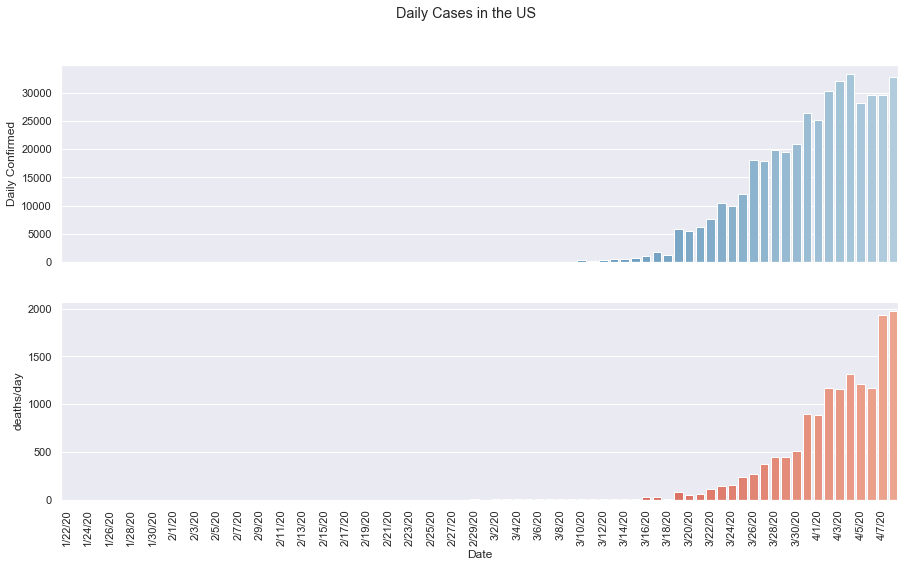

In [51]:
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,8), sharex=True)
ax1 = sns.barplot(covid_US['Date'], covid_US['confirmed/day'], palette='Blues_d', ax=ax1)
ax2 = sns.barplot(covid_US['Date'], covid_US['deaths/day'], palette='Reds_d', ax=ax2)
ax1.set_xlabel('')
ax1.set_ylabel('Daily Confirmed')
ticks = ax2.get_xticks()
labels = ax2.get_xticklabels()
ax2.set_xticks(ticks[::2])
ax2.set_xticklabels(labels[::2], rotation=90)
fig.suptitle('Daily Cases in the US')

In [69]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_Italy['Date'], y=covid_Italy['confirmed/day'], name='Italy'))
fig.add_trace(go.Scatter(x=covid_Spain['Date'], y=covid_Spain['confirmed/day'], name='Spain'))
fig.add_trace(go.Scatter(x=covid_US['Date'], y=covid_US['confirmed/day'], name='US'))
fig.update_layout(title='Daily Confirmed Cases')
fig.update_yaxes(title='Count')
fig.show()

In [68]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_Italy['Date'], y=covid_Italy['deaths/day'], name='Italy'))
fig.add_trace(go.Scatter(x=covid_Spain['Date'], y=covid_Spain['deaths/day'], name='Spain'))
fig.add_trace(go.Scatter(x=covid_US['Date'], y=covid_US['deaths/day'], name='US'))
fig.update_layout(title = 'Daily Deaths')
fig.update_yaxes(title = 'Count')
fig.show()

The total number cases per day in the US is still growing, with April 7th and 8th being the deadliest days yet. On the other hand, Spain and Italy have seen a drop in both the number of cases and the death count.

The spread of COVID-19 is still an ongoing situation. The comments made in this project might not be pertinent next week or even the next day. I will try and update the findings periodically. 